# Welcome to my code

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Data has been collected from kaggle's Archive MRI and Alzhiemers

URL- https://www.kaggle.com/jboysen/mri-and-alzheimers

In [2]:
df=pd.read_csv('oasis_cross-sectional.csv')
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


ID-Identification

M/F-Gender

Hand-Dominant Hand

Age-Age in years

Educ-Education Level

SES-Socioeconomic Status

MMSE-Mini Mental State Examination

CDR-Clinical Dementia Rating

eTIV-Estimated Total Intracranial Volume

nWBV-Normalize Whole Brain Volume

ASF - Atlas Scaling Factor

In [3]:
df=pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
df['Group'].replace({'Demented': 1, 'Nondemented': 0},inplace=True)
df['Group'].replace({'Converted':np.nan},inplace=True)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0.0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0.0,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1.0,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1.0,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1.0,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group         37
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.shape

(317, 15)

In [8]:
df.drop(['Subject ID','MRI ID','Hand'],axis=1,inplace=True)
df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.0,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0.0,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0.0,1,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0.0,2,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0.0,1,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039


# Imputational Strategy: Drop all missing Values

In [9]:
df.columns=['Demented','Visit','MR Delay','M/F','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']
df.head()

,Demented,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.0,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0.0,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0.0,1,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0.0,2,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0.0,1,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [10]:
f=df.loc[df['M/F']=='F','Demented']
female_dementia_rate=sum(f)/len(f)
print(f'Rate of females having Dementia: {female_dementia_rate}')
m=df.loc[df['M/F']=='M','Demented']
male_dementia_rate=sum(m)/len(m)
print(f'Rate of males having Dementia: {male_dementia_rate}')

Rate of females having Dementia: 0.2833333333333333
Rate of males having Dementia: 0.5547445255474452


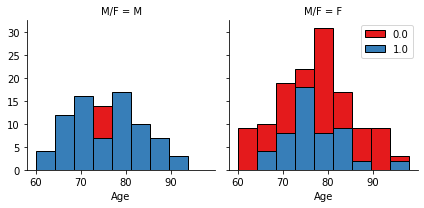

In [11]:
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="M/F", hue="Demented", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

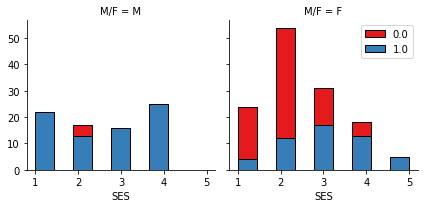

In [12]:
bins=np.linspace(df.SES.min(), df.SES.max(), 10)
g = sns.FacetGrid(df, col="M/F", hue="Demented", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SES', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Note for me

1 is used as a placeholder for Male ,0 is used as a placeholder for Female

In [13]:
df['M/F'].replace({'M': 1, 'F': 0},inplace=True)
df.head()

,Demented,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0.0,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0.0,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0.0,2,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0.0,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [25]:
df.reset_index(inplace = True)

In [14]:
df.dtypes

Demented    float64
Visit         int64
MR Delay      int64
M/F           int64
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
dtype: object

In [15]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])


Series([], dtype: int64)


In [16]:
df=df.astype('float64')

In [17]:
corr_matrix=df.corr()
corr_matrix

,Demented,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Demented,1.000000,-0.135657,-0.174719,0.274376,-0.053649,-0.220565,0.164715,-0.623282,0.857892,-0.013106,-0.331292,0.004759
Visit,-0.135657,1.000000,0.926652,0.050051,0.153081,-0.007313,-0.021887,-0.029681,-0.073054,0.120477,-0.079559,-0.124432
MR Delay,-0.174719,0.926652,1.000000,0.035934,0.187726,0.016258,0.002416,0.079692,-0.144138,0.119530,-0.066574,-0.123866
M/F,0.274376,0.050051,0.035934,1.000000,-0.054018,0.040806,-0.027069,-0.174880,0.210576,0.557709,-0.214547,-0.547144
Age,-0.053649,0.153081,0.187726,-0.054018,1.000000,-0.045386,-0.005012,0.046052,-0.032829,0.037093,-0.497126,-0.024315
EDUC,-0.220565,-0.007313,0.016258,0.040806,-0.045386,1.000000,-0.733018,0.185075,-0.149133,0.268585,0.015912,-0.252298
SES,0.164715,-0.021887,0.002416,-0.027069,-0.005012,-0.733018,1.000000,-0.135219,0.086957,-0.289781,0.048502,0.282657
MMSE,-0.623282,-0.029681,0.079692,-0.174880,0.046052,0.185075,-0.135219,1.000000,-0.726289,-0.020630,0.370714,0.031693
CDR,0.857892,-0.073054,-0.144138,0.210576,-0.032829,-0.149133,0.086957,-0.726289,1.000000,0.040713,-0.355149,-0.052438
eTIV,-0.013106,0.120477,0.119530,0.557709,0.037093,0.268585,-0.289781,-0.020630,0.040713,1.000000,-0.195075,-0.988639


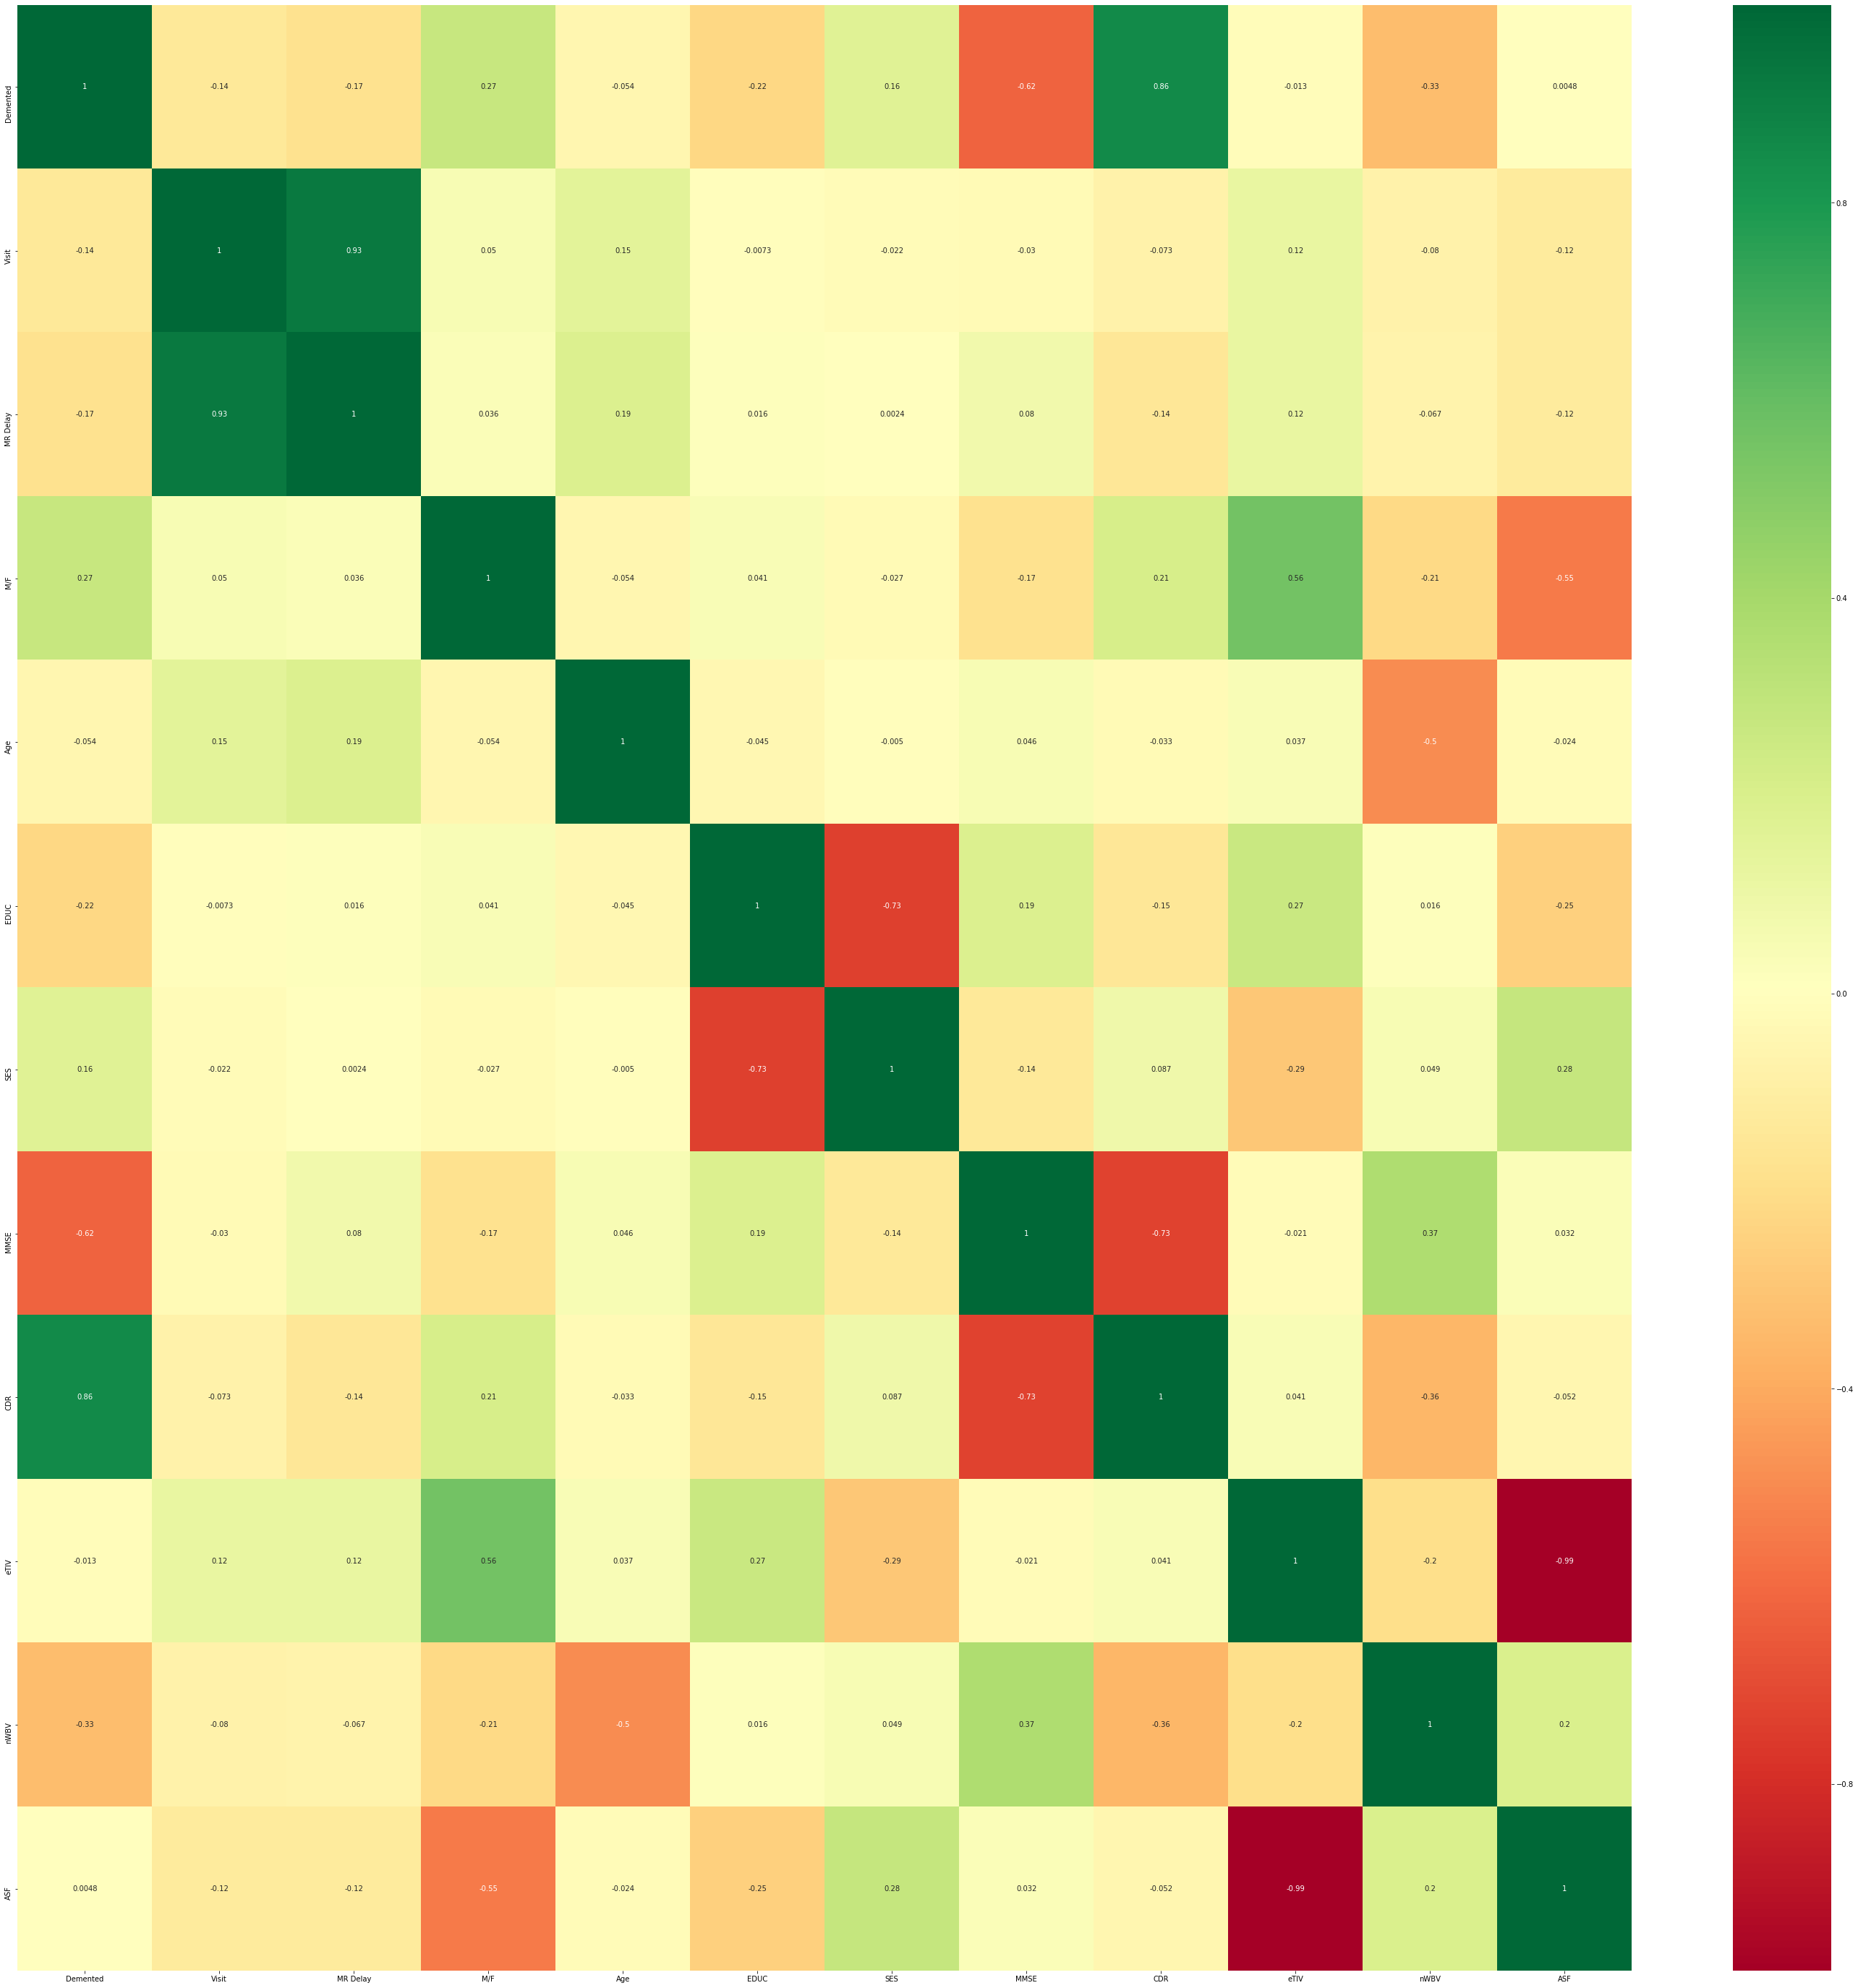

In [18]:
#get correlations of each features in dataset
corrmat = corr_matrix
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

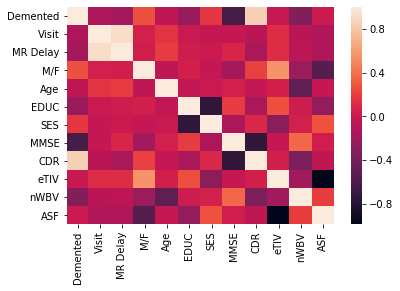

In [19]:
sns.heatmap(corr_matrix)

In [26]:
features=df[['Visit','MR Delay','M/F','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']]
print(features.shape)
Labels=df['Demented']
print(Labels.shape)

(317, 11)
(317,)


# Selecting Features and Labels

In [33]:
X = features
y=Labels
X[0:5]

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1.0,0.0,1.0,87.0,14.0,2.0,27.0,0.0,1987.0,0.696,0.883
1,2.0,457.0,1.0,88.0,14.0,2.0,30.0,0.0,2004.0,0.681,0.876
2,1.0,0.0,0.0,88.0,18.0,3.0,28.0,0.0,1215.0,0.710,1.444
3,2.0,538.0,0.0,90.0,18.0,3.0,27.0,0.0,1200.0,0.718,1.462
4,1.0,0.0,1.0,80.0,12.0,4.0,28.0,0.0,1689.0,0.712,1.039


# Normalization

In [34]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.9534368 , -0.93550304,  1.14624108,  1.3196767 , -0.2105024 ,
        -0.48669294, -0.06791717, -0.7151814 ,  2.7498629 , -0.90942562,
        -2.21314274],
       [ 0.1456158 , -0.20023872,  1.14624108,  1.44800109, -0.2105024 ,
        -0.48669294,  0.71026626, -0.7151814 ,  2.84460453, -1.30372842,
        -2.26334272],
       [-0.9534368 , -0.93550304, -0.87241682,  1.44800109,  1.15830296,
         0.40510857,  0.19147731, -0.7151814 , -1.55252145, -0.54140967,
         1.81002717],
       [ 0.1456158 , -0.06991835, -0.87241682,  1.70464987,  1.15830296,
         0.40510857, -0.06791717, -0.7151814 , -1.63611701, -0.33111484,
         1.93911283],
       [-0.9534368 , -0.93550304,  1.14624108,  0.42140596, -0.89490509,
         1.29691008,  0.19147731, -0.7151814 ,  1.08909796, -0.48883596,
        -1.09440031]])

# Classification
###  We would be using Four classification Method and comparing them in the End 
1. K Nearest Neighbor(KNN)
2. Decision Tree
3. Support Vector Machine
4. Logistic Regression

## KNN

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (253, 11) (253,)
Test set: (64, 11) (64,)


In [36]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [37]:
# just for sanity chaeck
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([0., 0., 0., 1., 0.])

In [38]:
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.953125, 0.90625 , 0.921875, 0.890625, 0.921875, 0.875   ,
       0.90625 , 0.875   , 0.875   , 0.859375, 0.859375, 0.84375 ,
       0.859375, 0.859375])

In [39]:
# Building the model again, using k=7
from sklearn.neighbors import KNeighborsClassifier
k = 1
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=1)

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
yhat = DT_model.predict(X_test)
yhat

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.])

## SVM

In [43]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVC()

In [44]:
yhat = SVM_model.predict(X_test)
yhat

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.])

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01)

In [46]:
yhat = LR_model.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.])

# Model Evaluation using Test set

In [50]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [58]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.89
KNN F1-score: 0.95


In [59]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.96
DT F1-score: 0.98


In [61]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.96
SVM F1-score: 0.98


In [62]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.63
LR F1-score: 0.84
LR LogLoss: 0.39
